# Getting started with DynamicFieldFlow

In this tutorial, we will demonstrate how DFT architectures can be created and simulated in Python. We are going to use two libraries:
- [DynamicFieldPy](https://github.com/danielsabinasz/DynamicFieldPy) (DFPy): A high-level API that allows to define DFT architectures in a generic way, i.e., in a way that is uncommitted as to the means by which the architecture is simulated (e.g., on a CPU, a GPU, or neuromorphic hardware).
- [DynamicFieldFlow](https://github.com/danielsabinasz/DynamicFieldFlow) (DFF): A library that allows to simulate DFPy architectures by means of the [TensorFlow](https://www.tensorflow.org) framework

# Preliminaries

## Installing DynamicFieldPy
The first step is to install the python package ``dfpy``. It can be installed from its [GitHub repository](https://github.com/danielsabinasz/DynamicFieldPy), e.g., by running the following command in a console:

```console
pip3 install git+https://github.com/danielsabinasz/DynamicFieldPy.git
```

## Installing DynamicFieldFlow
In order to simulate DFPy architectures, we use DFF. This library can be installed from its [GitHub repository](https://github.com/danielsabinasz/DynamicFieldFlow), e.g., by running the following command in a console:

```console
pip3 install git+https://github.com/danielsabinasz/DynamicFieldFlow.git
```

# Creating a simple architecture

In our first architecture, we will create a 2D field with size 51 x 51 that receives a Gaussian input. This can be done as follows:

In [1]:
from dfpy import *

field = Field((51, 51))
field.resting_level = -5.0
field.interaction_kernel = GaussWeightPattern(height=0.05, sigmas=(5.0, 5.0,))
field.global_inhibition = -0.005

gauss_input = GaussInput((51, 51))
gauss_input.mean = [15.0, 25.0]
gauss_input.sigmas = [5.0, 5.0]

connect(gauss_input, field);

## Simulating the architecture

Having created the DFPy architecture, we are now able to simulate it with DFF. For this purpose, we create a `Simulator` object and run a simulation for 200 ms. Note that upon the first simulation run, the architecture is converted into a computational graph suitable for simulation. This is a costly operation and may take a few seconds, depending on the hardware. However, this operation only needs to run once. All subsequent simulation calls run much faster.

In [2]:
from dff import *

simulator = Simulator()
simulator.simulate_for(200);

2023-02-13 11:48:38.228350: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-13 11:48:38.283504: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-13 11:48:38.283678: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-13 11:48:38.284419: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

## Plotting the activation

We may now plot the activation of the field:

<IPython.core.display.Javascript object>


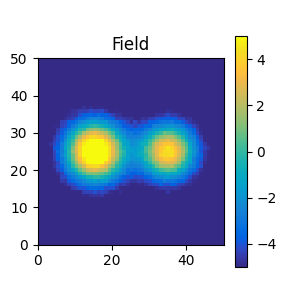

In [3]:
%matplotlib notebook
field_plot = default_snapshot_plot(field)
field_plot.draw(simulator.get_value(field))

Note that the Gaussian input was not sufficient to induce a peak in the field (the activation in the entire field is negative). This is because, by default, the Gaussian has a height of one. We can alter its height, run the simulation for another 200 ms, and redraw the plot:

In [4]:
gauss_input.height = 9.0
simulator.simulate_for(200)
field_plot.draw(simulator.get_value(field))

The plot above has been updated and should now depict a peak.

Let us create a second Gaussian input to the right of the first one and update the plot again:

In [5]:
gauss_input_2 = GaussInput((51, 51))
gauss_input_2.mean = [35.0, 25.0]
gauss_input_2.sigmas = [5.0, 5.0]
gauss_input_2.height = 4.0
connect(gauss_input_2, field)

simulator.simulate_for(200)
field_plot.draw(simulator.get_value(field))

As can be seen in the plot, the second Gaussian does not induce a peak, but only a subthreshold bump of activation.

# Exercises

## Exercise 1: Altering input strength

Your first exercise is to figure out why the second Gaussian does not induce a peak by looking at the previous code cell, and then fixing this by adding a single line of code to the code cell below. After running that code cell, the plot should depict two peaks.

In [6]:
# Insert your code below this line
gauss_input_2.height = 9.0

# Leave everything below this line untouched

simulator.simulate_for(200)
field_plot.draw(simulator.get_value(field))

## Exercise 2: Selection

Cognition depends crucially on the capacity to select representations for further processing. In DFT, selection is achieved by global inhibition in the field. Your exercise is to tune the architecture such that it makes a selection decision between the two Gaussian inputs. Only edit the designated lines of code. You can re-run the code cell as often as you like. It will re-run the simulation from the beginning each time.

In [ ]:
# Edit the code below this line

field.global_inhibition = -0.005
field.interaction_kernel = GaussWeightPattern(height=0.05, sigmas=(5.0, 5.0,))

# Leave everything below this line untouched

simulator.reset_time()
simulator.simulate_for(300)

field_plot_selection = default_snapshot_plot(field)
field_plot_selection.draw(simulator.get_value(field))

## Exercise 3: Short-term memory

In the following, we aim to tune the parameters of our architecture such that it may serve as a short-term memory. For this purpose, we create a code cell that sets both Gaussian inputs to a high amplitude, simulates the architecture for 300 ms, plots the field activation, then reduces the amplitudes to 0, simulates the architecture for another 300 ms, and again plots the field activation. Initially, the parameters are not tuned, so the peaks decay during the second simulation run. Your task is to tune the parameters of the field such that they no longer decay:

In [ ]:
# Edit the code below this line

field.interaction_kernel = GaussWeightPattern(height=0.0, sigmas=(5.0, 5.0,))
field.global_inhibition = -0.0

# Leave everything below this line untouched

gauss_input.height = 9.0
gauss_input_2.height = 9.0

simulator.reset_time()
simulator.simulate_for(300)

field_plot_after_300_ms = default_snapshot_plot(field)
field_plot_after_300_ms.draw(simulator.get_value(field))

gauss_input.height = 0.0
gauss_input_2.height = 0.0

simulator.simulate_for(300)

field_plot_after_600_ms = default_snapshot_plot(field)
field_plot_after_600_ms.draw(simulator.get_value(field))